## 1. Loading Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the cleaned data
cleaned_data = pd.read_csv('../data/product_cleaned.csv')

cleaned_data

,product_id,product_name,description,product_brand,gender,price_inr,primary_color
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,"Black and grey printed medium trolley bag, sec...",DKNY,Unisex,11745.0,Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,Beige & Grey made to measure kurta with churid...,EthnoVogue,Women,5810.0,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,Pink coloured wash 5-pocket high-rise cropped ...,SPYKAR,Women,899.0,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Blue self-design bandhgala suitBlue self-desig...,Raymond,Men,5599.0,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,"Brown and off-white printed casual shirt, has ...",Parx,Men,759.0,White
...,...,...,...,...,...,...,...
11592,10261595,Laceandme Black Lace Non-Wired Lightly Padded ...,Black lace full-coverage Bralette bra Lightly ...,Laceandme,Women,569.0,Red
11593,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,"Black dark wash 5-pocket low-rise jeans, clean...",Pepe Jeans,Men,1299.0,Black
11594,10261721,Mochi Women Gold-Toned Solid Heels,"A pair of gold-toned open toe heels, has regul...",Mochi,Women,1990.0,Gold
11595,10261607,612 league Girls Navy Blue & White Printed Reg...,Navy Blue and White printed mid-rise denim sho...,612 league,Girls,602.0,Blue


## 2. Exploratory Data Analysis (EDA)

- Gender distribution

- Color distribution

- Price distribution

- Brand & Price distribution

### 2.1 Gender Distribution

In [82]:
# Unique value counts for 'gender'
gender_counts = cleaned_data['gender'].value_counts().sort_values(ascending=False)

gender_counts


gender
Women          4732
Men            4343
Unisex         1056
Boys           1032
Girls           388
Unisex Kids      46
Name: count, dtype: int64

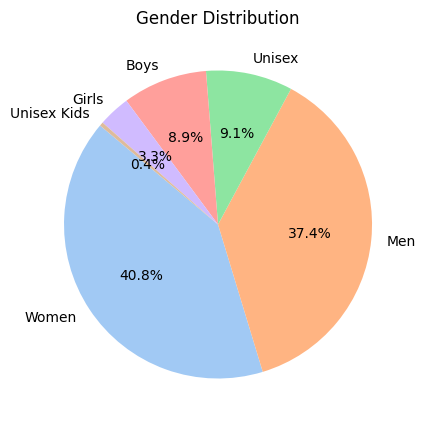

In [83]:
# Visualize 'gender' distribution
labels=gender_counts.index
sizes = gender_counts.values

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')

# Display plot
plt.show()

### 2.2 Color Distribution

In [84]:
# Unique values in 'primary_color' column
primary_color_counts = cleaned_data['primary_color'].value_counts().sort_values(ascending=False)

primary_color_counts

primary_color
Blue        3443
Black       1640
Red         1543
Green        908
White        880
Grey         684
Brown        473
Yellow       406
Pink         391
Gold         236
Beige        236
Maroon       187
Orange       130
Silver       111
Purple        65
Burgundy      64
Khaki         56
Navy          54
Lavender      19
Matte         17
Mustard       15
Magenta       13
Charcoal      10
Rose           8
Platinum       3
Bronze         3
Peach          2
Name: count, dtype: int64

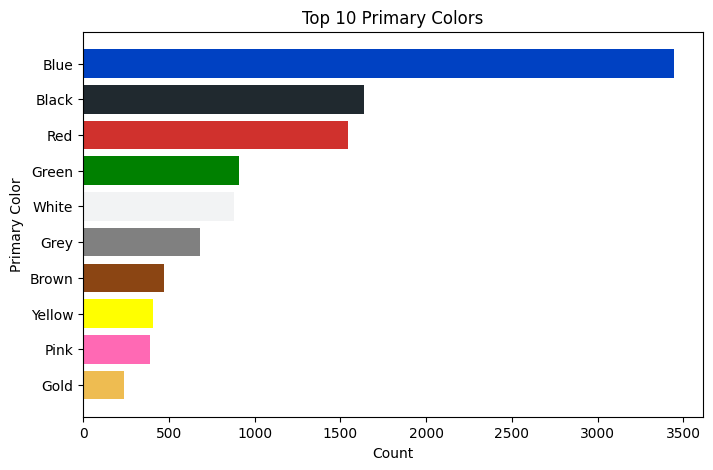

In [85]:
# Visualize 'primary_color' distribution
color_mapping = {
    'Blue': '#0041c2',
    'Black': '#20292f',
    'Red': '#d0312d',
    'Green': 'green',
    'White': '#f2f3f4',
    'Grey': 'grey',
    'Brown': 'saddlebrown',
    'Yellow': '#FFFF00',
    'Pink': 'hotpink',
    'Beige': 'moccasin',
    'Gold': '#eebc51',
    'Maroon': 'maroon',
    'Orange': '#FF7F0E',
    'Silver': '#c0c0c0',
    'Purple': 'purple',
    'Burgundy': '#660033',
    'Khaki': '#c3b091',
    'Navy': 'navy',
    'Lavender': '#dfc5fe',
    'Matte': '#854B4A',
    'Mustard': '#e1ad01',
    'Magenta': '#ec00bc',
    'Charcoal': '#36454f',
    'Rose': 'pink',
    'Platinum': '#e5e4de',
    'Bronze': '#c76d40',
    'Peach': '#f4a384',
}

top_colors = primary_color_counts.head(10)

colors = [color_mapping.get(color) for color in top_colors.index]


# Plot the top 10 primary colors
plt.figure(figsize=(8, 5))
plt.barh(top_colors.index, top_colors.values, color=colors)
plt.title('Top 10 Primary Colors')
plt.xlabel('Count')
plt.ylabel('Primary Color')
plt.gca().invert_yaxis()
plt.show()

### 2.3 Price Distribution

In [86]:
# Check peice descriptive statistics
cleaned_data['price_inr'].describe()

count    11597.000000
mean      1460.912995
std       2159.003043
min        153.000000
25%        649.000000
50%        939.000000
75%       1499.000000
max      63090.000000
Name: price_inr, dtype: float64

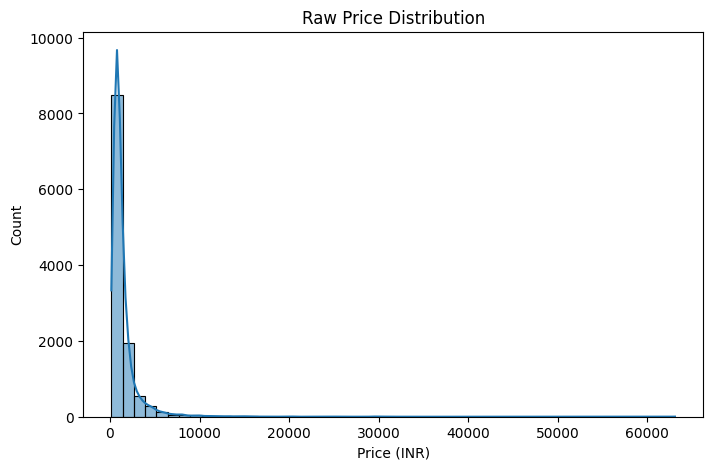

In [87]:
# Check raw histogram of 'price_inr'
plt.figure(figsize=(8,5))
sns.histplot(cleaned_data['price_inr'], bins=50, kde=True)
plt.title('Raw Price Distribution')
plt.xlabel('Price (INR)')
plt.show()

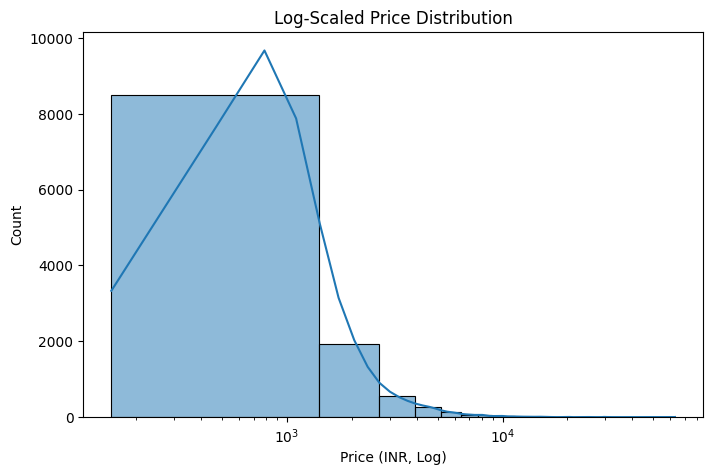

In [88]:
# Check log histogram of 'price_inr'

plt.figure(figsize=(8,5))
sns.histplot(cleaned_data['price_inr'], bins=50, kde=True)
plt.xscale('log')
plt.title('Log-Scaled Price Distribution')
plt.xlabel('Price (INR, Log)')
plt.show()


- The price distribution shows a highly right-skewed long-tail pattern.

- Median price is 939 INR, with 75% of products priced below 1500 INR.

- Most products fall within the 500-2000 INR range.

- Only a small proportion of products are priced above 10000 INR.

- Log-scaled histogram clearly demonstrates the concentration in the lower price ranges.


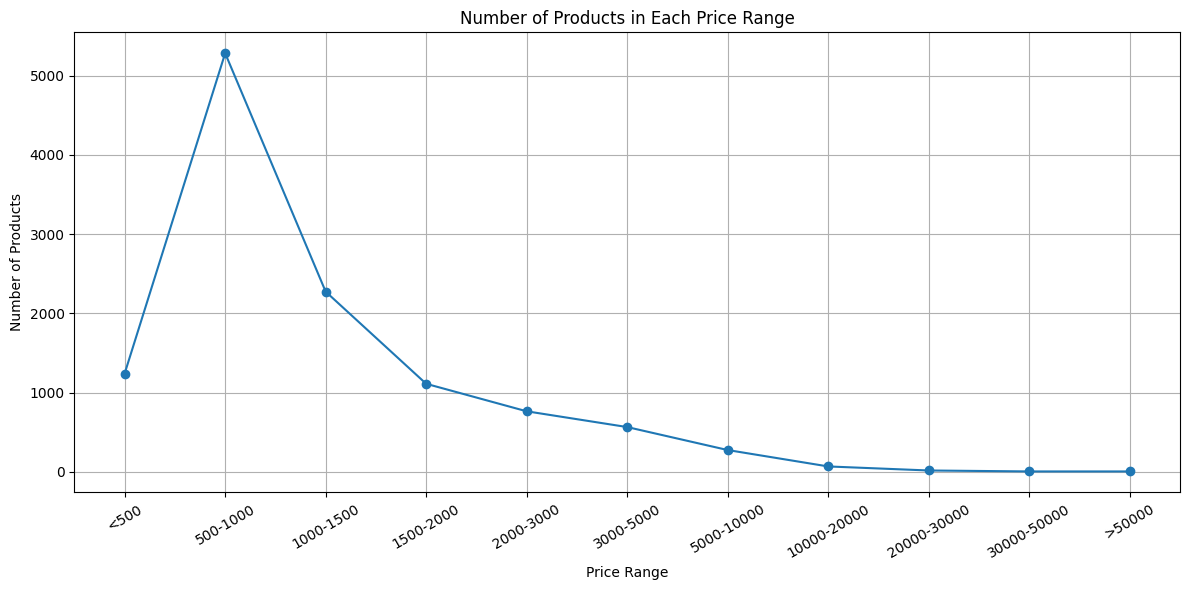

In [89]:
# Price Binning Analysis
# Define price ranges for grouping
price_bins = [0, 500, 1000, 1500, 2000, 3000, 5000, 10000, 20000, 30000, 50000, float('inf')]
price_labels = [
    '<500', '500-1000', '1000-1500', '1500-2000', '2000-3000', 
    '3000-5000', '5000-10000', '10000-20000', '20000-30000', 
    '30000-50000', '>50000'
]

# Create a new column 'price_range' with binned price categories
cleaned_data['price_range'] = pd.cut(cleaned_data['price_inr'], bins=price_bins, labels=price_labels, right=False)

# Count the number of pieces in each price bin
price_bin_counts = cleaned_data['price_range'].value_counts().sort_index()

# Visualize the price bin distribution
plt.figure(figsize=(12, 6))
price_bin_counts.plot(kind='line', marker='o')

plt.title('Number of Products in Each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.xticks(range(len(price_labels)), price_labels, rotation=30)
plt.tight_layout()
plt.grid()

plt.show()

### Price Distribution Summary

- Based on descriptive statistics and histogram visualization, the price bins were defined to reflect realistic pricing tiers.

- Most products are priced between 500 INR and 2000 INR, with a clear long-tail distribution for high-end products.

### 2.4 Brand & Price Distribution

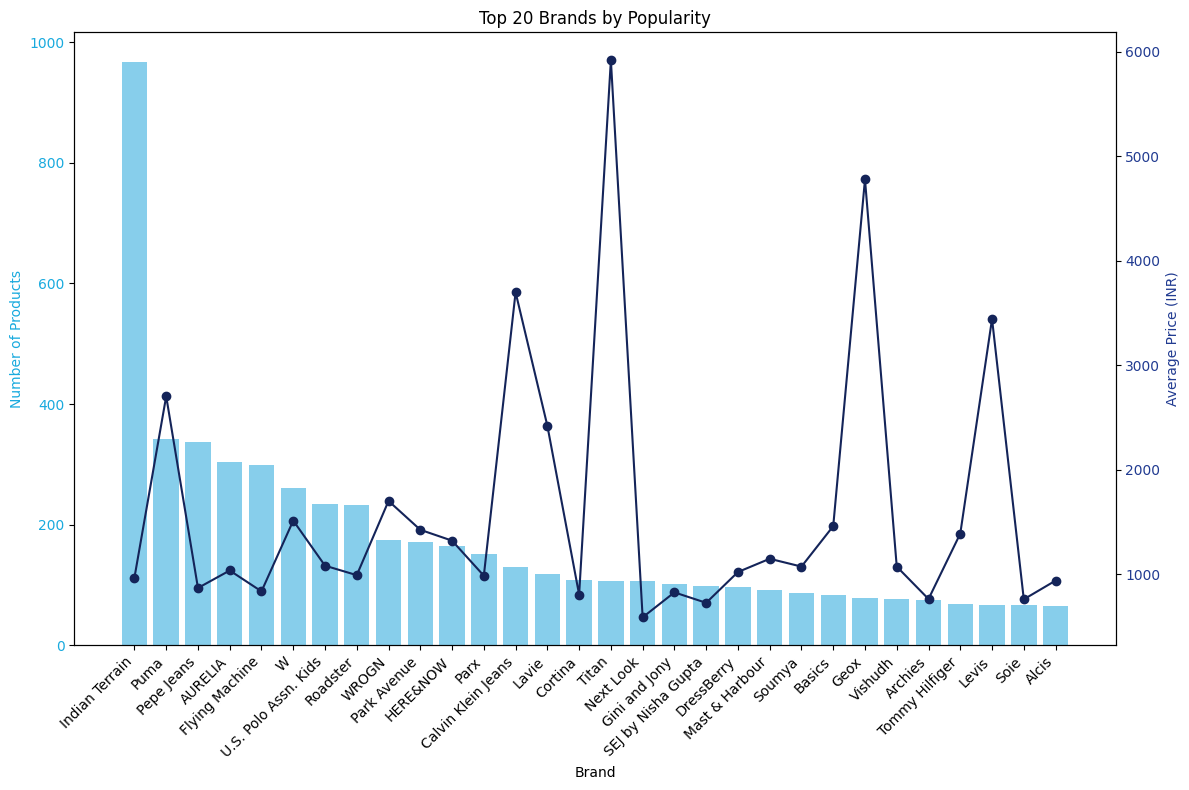

In [90]:
# Brand popularity analysis
top_brands = cleaned_data['product_brand'].value_counts().head(30).index
brand_counts = cleaned_data['product_brand'].value_counts().head(30)

# Calculate average price for each of the top 20 brands
avg_prices = cleaned_data[cleaned_data['product_brand'].isin(top_brands)].groupby('product_brand')['price_inr'].mean().reindex(top_brands)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar graph for number of products
color="skyblue"
ax1.set_xlabel('Brand')
ax1.set_ylabel('Number of Products', color='#19aade')
ax1.bar(brand_counts.index, brand_counts.values, color=color)
ax1.tick_params(axis='y', labelcolor='#19aade')
ax1.set_xticks(range(len(brand_counts.index))) 
ax1.set_xticklabels(brand_counts.index, rotation=45, ha='right')

# Line graph for average price
ax2 = ax1.twinx()
color = '#142459'
ax2.set_ylabel('Average Price (INR)', color='#213B91')
ax2.plot(avg_prices.index, avg_prices.values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor='#213B91')

# Title and layout
plt.title('Top 20 Brands by Popularity')
fig.tight_layout()

# Show the plot
plt.show()